# The Lotka Volterra Model: an Analyisis
#### by Brent Mercado

The Lotka Volterra model is a predator-prey mathematical model, which observes the behavior of two species of animal's population in proportion to eachother as they exist in their environment - being that one population is directly affected by the other (predators eating their prey). This is modeled by a pair of coupled differential equations, which protrays the population of predator species growing at the expense of the [prey. ](https://www.sciencedirect.com/topics/earth-and-planetary-sciences/lotka-volterra-model#:~:text=The%20Lotka–Volterra%20model%20explores,not%20explicitly%20stated%20or%20explored.)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Lotka_Volterra_dynamics.svg/676px-Lotka_Volterra_dynamics.svg.png" width=400 height=400 /> 

This model is characterized by it's respective pair of differential equations, represented by:

$$ 
\frac{dx}{dt} = \ αx - βxy 
$$

$$
\frac{dy}{dt} = \ δxy - γy
$$

where `x` represents the prey population density, and `y` represents the predator population density. `α` and `β`are the corresponding rates of growth and death in the prey populations; `δ`and `γ` being the same corresponding variables, but for the predator population.

In this notebook, we will model and visualize these equations, and further analyze scenerios and limitation that can be applied to this model.

In [1]:
#import libraries

%matplotlib inline 
#to configure Jupyter so figures appear in the notebook
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign' 
#to Configure Jupyter to display the assigned value after an assignment

# import functions from the modsim.py module, numpy and pandas
from modsim import *
import numpy as np
import pandas as pd

## Initializing the System
To demonstrate this model, we will use a `System` object from the modsim library. We will store all of our relevant data (variables of the equation) to refer to for our model implementation and execution.

In [2]:
system = System(t_0=0, 
                t_end=5999, 
                dt = 0.01,
                x_0 = 100, 
                y_0 = 10,
                alpha = 0.5,
                beta = 0.015,
                delta = 0.015,
                gamma = 0.5)  

,values
t_0,0.000
t_end,5999.000
dt,0.010
x_0,100.000
y_0,10.000
alpha,0.500
beta,0.015
delta,0.015
gamma,0.500


Above, we can characterize `t_0` and `t_end` as our time values - since we are observing the behavior of the model we can utilize the time span of *5999.000*, which will allow us to observe the cycles in our model.

`dt` will be our 'time step' variable that we will use in our function, that allows us to model a differential equation through python.

`x_0` and `y_0` are our initial populations with respect to the original model.

The corresponding `alpha`, `beta`, `delta`, and `gamma` variables stand as the same variables to the equations we are modelling above, respectively.  

## Creating Our Functions

In [3]:
def update_func(x, y, step, system):
    """
    Update population based on the Lotka Volterra pair of diferential equations. 
    Is a function peice of the full Lotka Volterra Model implementation.
    
    :x: current population of prey, Type: float
    :y: current population of predators, Type: float
    :step: time step varaible of given model, dt, Type: float
    :system: system object with model parameters, Type: System object
    
    :returns: x_new, y_new as a tuple
    """
    x_new = x + ((system.alpha*x) - (system.beta*x*y))*step
    y_new = y + ((system.delta*x*y)-(system.gamma*y))*step
    
    return x_new,y_new


In [4]:
def run_simulation(system, update_func):
    """
    Simulate the Lotka Volterra Model using given update function. 
    Note: function will not work/incorrectly protray data if update_func() is missing/incorrect
    
    :system: system object with model parameters, System object
    :update_func: function that computes the population next year, Python function
    
    returns: results_x, results_y as a tuple of TimeSeries objects 
    """
    results_x = TimeSeries()
    results_y = TimeSeries()
    results_y[system.t_0] = system.y_0
    results_x[system.t_0] = system.x_0
    
    for t in linrange(system.t_0, system.t_end):
        temp = update_func(results_x[t],results_y[t],system.dt,system)
        results_x[t+1] = temp[0]
        results_y[t+1] = temp[1]
        
    return results_x,results_y

#### Above are our simulation functions which we will use to represent our model. We utilize a update function to be able to process our resulatant from the *differential equations*, which rely on the previous resultant to produce an answer (hence our 'time step' values being present).

In [5]:
def plot_results(resultx,resulty, title):
    '''
    Plot the estimates and the model
    
    :resultx: TimeSeries of resultant prey populaton 
    :resulty: TimeSeries of resultant predator population
    :title: string
    '''
    plt.figure(figsize=(9, 5))
    plot(resultx, color='r', label='Rabbit')
    plot(resulty, color='b', label='Fox')

    
    decorate(xlabel='Time', 
             ylabel='Population',
             title=title)

#### Above is our plotting function, where in which we can plot the resultants of our Lotka Volterra Model
note: *Rabbit* label represents prey population, while *Fox* label represents Predator popualation

# Running, Plotting and Analyzing our Model

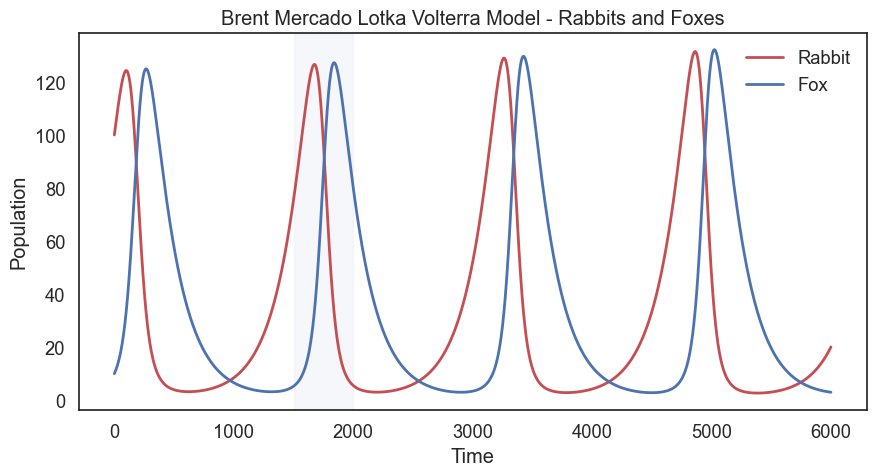

In [6]:
results = run_simulation(system, update_func)
plot_results(results[0],results[1],'Brent Mercado Lotka Volterra Model - Rabbits and Foxes')
plt.axvspan(1500, 2000, color='C0', alpha=0.05)

Here, we can observe the behavior of the Lotka Volterra Model - it is an oscillating graph! As we look closer, the populations of the resultant prey and predator series are very similar, with one difference. They are offset from eachother. This offset represents the behavior of the populations as the relate to eachother. Taking a closer look into the blue section we highlighted on the graph, we can see that our populations rise and grow at the expense of the eachother. Logically so, as the Fox population increases to a peak the rabbit populations fall until the Foxes no longer have sufficent food and begin to die off.

Lets take an even closer look using the Pandas library `describe()` function

In [7]:
df_prey = pd.DataFrame(results[0]) #assign each resultant TimeSeries Object to a Pandas DataFrame
df_pred = pd.DataFrame(results[1])

df_prey.describe()

,0
count,6000.000000
mean,32.101965
std,39.030855
min,2.674418
25%,4.308274
50%,11.489361
75%,47.572313
max,131.461181


In [8]:
df_pred.describe()

,0
count,6000.000000
mean,34.997349
std,39.106891
min,2.813923
25%,5.019354
50%,15.388350
75%,55.062496
max,132.158501


Above, we can observe the peaks and means given by the populations - they are behave in essentially the same congurent manner, when coupled with the information given in the graph, we can further see that these two figures are dependent on eachother to build a population. This means that though the populations have the same ability to reach the same given maximum capacity, they can't do so at the same time.

# Scenario Analysis

To further analyze the behavior of this model, we will propose a scenario:

#### In California, the [Vulpes macrotis mutica](https://esrp.csustan.edu/publications/pubhtml.php?doc=sjvrp&file=chapter02L00.html) is a common Fox-dweller of the general San Joaqin area. There is an estimated population of 696 foxes total.
<img src="https://www.cabidigitallibrary.org/cms/10.1079/cabicompendium.121756/asset/653fdadd-dfe9-4f9d-961a-9505e18cdac6/assets/graphic/121756_02.jpg" width=300 height=300 /> 

#### In the same area, the [Riparian Bush Rabbits](https://www.oaklandzoo.org/wildlife-conservation/riparian-brush-rabbit#:~:text=This%20small%20and%20lively%20rabbit,less%20than%202%2C000%20in%20total.) roam freely to be preyed upon by our fox, with a population in the 2,000 range. In this case, we will use 2,000 to represent our rabbit popluation.

<img src="https://assets-global.website-files.com/5adf752e38b7222e27f146ee/6176061f108012183897fdad_riparian-brush-rabbit-inset-1.jpg" width=300 height=300 /> 

In the advent of global warming, extreme temprature swings affect the world. In our scenario, we will say that a cold snap will hit our portion of California, affecting our rabbit's ability to live and reproduce, since they tend to be delicate creatures to their environment. Let's translate this infomation into our system object:


In [9]:
system = System(t_0=0, 
                t_end=15000,
                dt = 0.01,
                x_0 = 200,    #given intial rabbit population of 2000
                y_0 = 70,     #given initial fox population of 696, simplified to 700
                alpha = 0.2,  #reduced birth rate 
                beta = 0.02, #increased death rate
                delta = 0.015,
                gamma = 0.5)

,values
t_0,0.000
t_end,15000.000
dt,0.010
x_0,200.000
y_0,70.000
alpha,0.200
beta,0.020
delta,0.015
gamma,0.500


For simplication, we will categorize the populations through multiples of 10 (i.e 2000 as 200, 700 as 70). 

## Up-keeping and Updating
To give a greater sense of understanding of this model, we shall say that every 2000 values of time is 1 year. A cold snap usually only occurs once in every couple of years - so lets make our model dynamic and change our rabbit birth and death rates after 2 years. We can keep track of this with an updated run function :

In [10]:
def run_simulation_SJ(system, update_func):
    """
    Simulate the Lotka Volterra Model using given update function. 
    Note: function will not work/incorrectly protray data if update_func() is missing/incorrect
    
    :system: system object with model parameters, System object
    :update_func: function that computes the population next year, Python function
    
    returns: results_x, results_y as a tuple of TimeSeries objects 
    """
    results_x = TimeSeries()
    results_y = TimeSeries()
    results_y[system.t_0] = system.y_0
    results_x[system.t_0] = system.x_0
    
    for t in linrange(system.t_0, system.t_end):
        temp = update_func(results_x[t],results_y[t],system.dt,system)
        results_x[t+1] = temp[0]
        results_y[t+1] = temp[1]
        if t == 6000:
            system.alpha = 0.5  #change birth and death rates back to normal
            system.beta = 0.015 
        
    return results_x,results_y

We set the condition to t_0 at 6000 because it would be the beginning of the following year after the second has elapsed. Since we updated our run function, we will also update our plot function to accuretely represent the span of time:

In [11]:
def plot_results(resultx,resulty, title):
    '''
    Plot the estimates and the model
    
    :resultx: TimeSeries of resultant prey populaton 
    :resulty: TimeSeries of resultant predator population
    :title: string
    '''
    plt.figure(figsize=(9, 5))
    plt.plot(resultx, color='r', label='Rabbit')
    plt.plot(resulty, color='b', label='Fox')

    decorate(xlabel='Time (year in multiples of 2000)', 
             ylabel='Population (in multiples of 10)',
             title=title)

## Running the Simulation

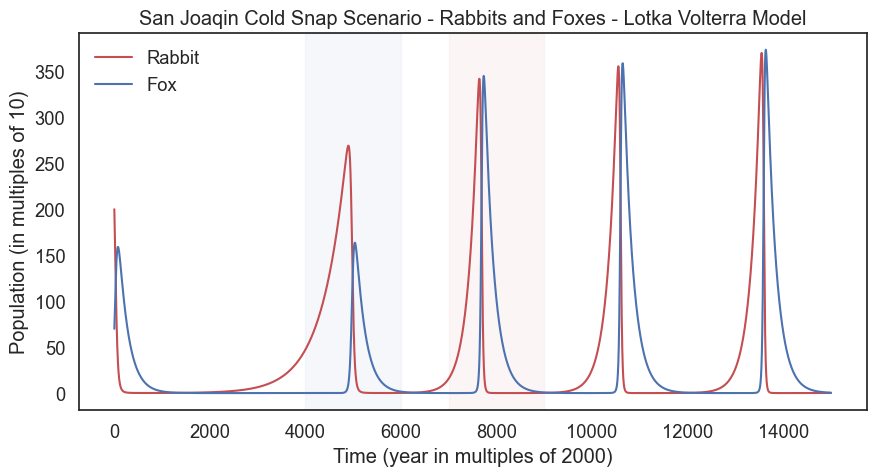

In [12]:
results = run_simulation_SJ(system, update_func)
plot_results(results[0],results[1],'San Joaqin Cold Snap Scenario - Rabbits and Foxes - Lotka Volterra Model')
plt.axvspan(4000, 6000, color='b', alpha=0.05)
plt.axvspan(7000, 9000, color='r', alpha=0.05)

Here, we can observe the true effect each population has on eachother. Despite the starting populations being the same, it is apparant the the sharp decline of rabbits during the hypothetical cold-snap radically affected the population of the foxes, so much so that when the original growth and death rates normalized in year 3, the population of foxes shot up significantly. 

In [13]:
df_prey = pd.DataFrame(results[0]) #assign each resultant TimeSeries Object to a Pandas DataFrame
df_pred = pd.DataFrame(results[1])

df_prey.describe()

,0
count,15001.000000
mean,31.439383
std,69.522376
min,0.004379
25%,0.093312
50%,0.954904
75%,18.788089
max,370.190778


In [14]:
df_pred.describe()

,0
count,15001.000000
mean,26.142114
std,63.612570
min,0.000016
25%,0.014389
50%,0.408269
75%,12.036702
max,373.661585


The [absolute maxima](https://www.geeksforgeeks.org/absolute-minima-and-maxima/) of the predators given the graphs cold-snap local maxima fox populations (rougly ~150 foxes), being over twice as much (post cold-snap conditions) illustrate the importance of the existence of each species proportionally to their population

# Conclusion

Using our base representation of the *Lotka Volterra* Model, we were able to portray the behaviors of prey and predator populations in proportion to eachother. It is apparent that predators and pray have an inverse relationship - as illustrated by the model. When prey population increases, the predator population also increase in an offset manner, as a means to respresent them beginning and then finishing waves of consumtio coupled with birth and death rates. This applies conversely to the predators. It is also indicative that the Lotka volterra Model is a cyclical model, a model that oscillates over time unless dynamically changed (like our San Joaqin scenario).

Though the Lotka Volterra is a very useful tool to represent proportionality of populations and differential equation behavior, it is indicative that the model has it's own disadvantages. The biggest pitfall of the model is that it fails to account for the predators appetite/frequency of consumption of prey, which innacurately protrays the true behavior of any predatious animal in nature. Furthermore, the model also assumes that prey have only factors of death based on predation, which can be extremely variable depending on the environment each animal is in. For example, if an environment is particularly barren of prey feed, we cannot attribute predation for all causes of death in the prey population.

The Lotka Volterra model protrays the notion that predator and prey influence eachother, and highlights the selective pressures that occur in nature which force each species to co-exist at eachothers expense.

<img src="https://www.guitarmasterclass.net/guitar_forum/uploads/monthly_05_2012/post-9820-1336377790.jpg" width=300 height=300 /> 

